<a href="https://colab.research.google.com/github/syeda-rosa10/knightml/blob/master/variety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount("/content/drive/") 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
wine_train=pd.read_csv("/content/drive/My Drive/fin tech/train.csv")

In [106]:
wine_train.head(5)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [107]:
wine_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [108]:
wine_train.shape

(82657, 12)

In [109]:
wine_train.describe(include='all')

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
count,63264,82622,82657,82657,59010,82657.000000,77088.000000,82622,69903,35949,82657,82657
unique,15,38,76983,77628,26424,NaN,NaN,358,1019,17,13786,28
top,@vossroger,US,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,"Named after the kingfisher bird, this wine has...",Reserve,NaN,NaN,California,Napa Valley,Central Coast,Testarossa,Pinot Noir
freq,17539,38573,8,2,1382,NaN,NaN,25736,3334,7503,175,10587
mean,NaN,NaN,NaN,NaN,NaN,88.544564,36.922232,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.099649,43.698346,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,80.000000,4.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,86.000000,18.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,88.000000,27.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,91.000000,45.000000,NaN,NaN,NaN,NaN,NaN


In [110]:
dup=wine_train[wine_train['review_description'].duplicated(keep = False)].sort_values('review_description')
dup.head(8)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
53655,@wawinereport,US,Roza Ridge 2010 Malbec (Rattlesnake Hills),"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Roza Ridge,Malbec
73628,@wawinereport,US,Roza Ridge 2010 Malbec (Rattlesnake Hills),"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Roza Ridge,Malbec
64962,@wawinereport,US,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Ross Andrew,Rosé
81272,@wawinereport,US,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Ross Andrew,Rosé
45297,@vossroger,France,Château Haut-Sarpe 2008 Barrel sample (Saint-...,87-89 Barrel sample. Minty aromas give lifted ...,Barrel sample,88,NaN,Bordeaux,Saint-Émilion,NaN,Château Haut-Sarpe,Bordeaux-style Red Blend
32203,@vossroger,France,Château Haut-Sarpe 2008 Barrel sample (Saint-...,87-89 Barrel sample. Minty aromas give lifted ...,Barrel sample,88,NaN,Bordeaux,Saint-Émilion,NaN,Château Haut-Sarpe,Bordeaux-style Red Blend
32312,@vossroger,France,Château Bertineau Saint-Vincent 2008 Barrel sa...,87-89 Barrel sample. With its lovely fresh fru...,Barrel sample,88,NaN,Bordeaux,Lalande de Pomerol,NaN,Château Bertineau Saint-Vincent,Bordeaux-style Red Blend
69677,@vossroger,France,Château Bertineau Saint-Vincent 2008 Barrel sa...,87-89 Barrel sample. With its lovely fresh fru...,Barrel sample,88,NaN,Bordeaux,Lalande de Pomerol,NaN,Château Bertineau Saint-Vincent,Bordeaux-style Red Blend


In [0]:
wine_train=wine_train.drop_duplicates("review_description")

In [112]:
wine_train.shape

(77628, 12)

### Visaulization

In [113]:
wine_train['variety'].unique()

array(['Chardonnay', 'Red Blend', 'Nebbiolo',
       'Bordeaux-style White Blend', 'Malbec', 'Cabernet Sauvignon',
       'Zinfandel', 'Pinot Noir', 'Sauvignon Blanc', 'Gamay',
       'Grüner Veltliner', 'Bordeaux-style Red Blend', 'Sangiovese',
       'Syrah', 'White Blend', 'Cabernet Franc', 'Portuguese Red',
       'Portuguese White', 'Rhône-style Red Blend', 'Rosé',
       'Champagne Blend', 'Merlot', 'Riesling', 'Sparkling Blend',
       'Pinot Grigio', 'Tempranillo', 'Pinot Gris', 'Gewürztraminer'],
      dtype=object)

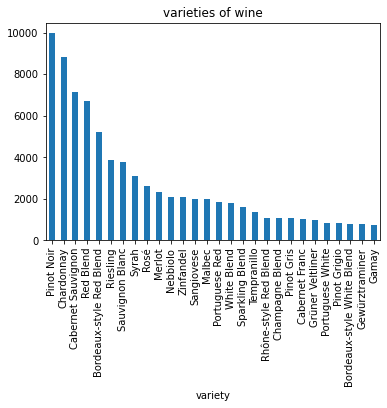

In [114]:
wine_train['variety'].value_counts().plot.bar()
plt.title("varieties of wine")
plt.xlabel("variety")

plt.show()

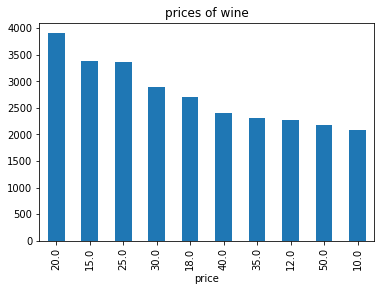

In [115]:
wine_train['price'].value_counts().head(10).plot.bar()
plt.title("prices of wine")
plt.xlabel("price")

plt.show()

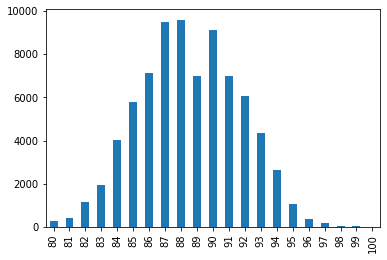

In [116]:
wine_train['points'].value_counts().sort_index().plot.bar(stacked=True)

In [117]:
len(wine_train[wine_train.points==100])

12

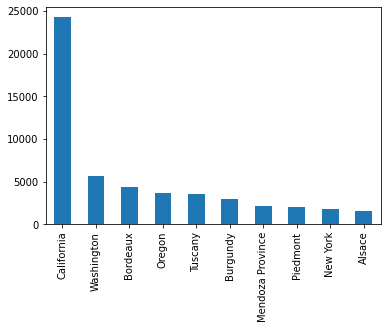

In [118]:
wine_train['province'].value_counts().head(10).plot.bar()

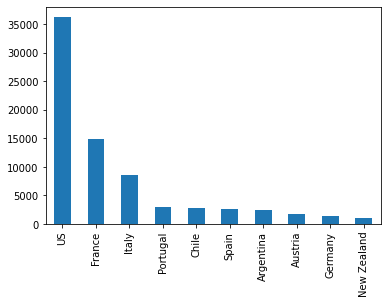

In [119]:
wine_train['country'].value_counts().head(10).plot.bar()

In [120]:
wine_train.groupby('points').count()

,user_name,country,review_title,review_description,designation,price,province,region_1,region_2,winery,variety
points,,,,,,,,,,,
80,167,254,254,254,164,254,254,212,94,254,254
81,260,433,433,433,246,428,433,358,204,433,433
82,609,1173,1174,1174,679,1140,1173,1005,672,1174,1174
83,1301,1918,1919,1919,1178,1840,1918,1590,807,1919,1919
84,2647,4043,4045,4045,2413,3803,4043,3340,1624,4045,4045
85,4122,5761,5762,5762,3603,5418,5761,4693,2290,5762,5762
86,5206,7116,7118,7118,4592,6660,7116,5861,2927,7118,7118
87,6841,9488,9490,9490,6284,8891,9488,8071,4024,9490,9490
88,7617,9582,9588,9588,6646,8952,9582,8186,4139,9588,9588


In [121]:
wine_train[wine_train.points==100]

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
2897,@paulgwine,US,Cayuse 2008 Bionic Frog Syrah (Walla Walla Val...,Initially a rather subdued Frog; as if it has ...,Bionic Frog,100,80.0,Washington,Walla Walla Valley (WA),Columbia Valley,Cayuse,Syrah
3221,@vossroger,France,Château Lafite Rothschild 2010 Pauillac,"Almost black in color, this stunning wine is g...",NaN,100,1500.0,Bordeaux,Pauillac,NaN,Château Lafite Rothschild,Bordeaux-style Red Blend
11704,NaN,Italy,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,NaN,Tenuta dell'Ornellaia,Merlot
19993,@vossroger,France,Château Cheval Blanc 2010 Saint-Émilion,This is the finest Cheval Blanc for many years...,NaN,100,1500.0,Bordeaux,Saint-Émilion,NaN,Château Cheval Blanc,Bordeaux-style Red Blend
20182,@vossroger,France,Château Haut-Brion 2014 Pessac-Léognan,"Full of ripe fruit, opulent and concentrated, ...",NaN,100,848.0,Bordeaux,Pessac-Léognan,NaN,Château Haut-Brion,Bordeaux-style White Blend
27179,@vossroger,France,Château Léoville Barton 2010 Saint-Julien,"This is a magnificently solid wine, initially ...",NaN,100,150.0,Bordeaux,Saint-Julien,NaN,Château Léoville Barton,Bordeaux-style Red Blend
31572,@kerinokeefe,Italy,Biondi Santi 2010 Riserva (Brunello di Montal...,"This gorgeous, fragrant wine opens with classi...",Riserva,100,550.0,Tuscany,Brunello di Montalcino,NaN,Biondi Santi,Sangiovese
35492,@vossroger,France,Château Léoville Las Cases 2010 Saint-Julien,"A hugely powerful wine, full of dark, brooding...",NaN,100,359.0,Bordeaux,Saint-Julien,NaN,Château Léoville Las Cases,Bordeaux-style Red Blend
41362,NaN,US,Cardinale 2006 Cabernet Sauvignon (Napa Valley),Tasted in a flight of great and famous Napa wi...,NaN,100,200.0,California,Napa Valley,Napa,Cardinale,Cabernet Sauvignon
46864,@vossroger,France,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,This new release from a great vintage for Char...,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Champagne,NaN,Salon,Chardonnay


In [122]:
wine_train['price'].isna().value_counts()

False    72344
True      5284
Name: price, dtype: int64

In [0]:
wine_train.dropna(subset=['price'],inplace=True)

In [124]:
wine_train.shape

(72344, 12)

### Cleanin the description

In [0]:
X = wine_train.drop(['user_name','country','review_title','points','province','region_1','region_2','variety','winery','designation'], axis = 1)
y = wine_train.variety

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(  X, y, random_state=42, stratify=y)

In [0]:
import re
from nltk.corpus import stopwords

In [86]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [88]:
wine =wine_train.variety.unique().tolist()
wine.sort()
wine[:10]

['Bordeaux-style Red Blend',
 'Bordeaux-style White Blend',
 'Cabernet Franc',
 'Cabernet Sauvignon',
 'Champagne Blend',
 'Chardonnay',
 'Gamay',
 'Gewürztraminer',
 'Grüner Veltliner',
 'Malbec']

In [89]:
output = set()
for x in wine_train.variety:
    x = x.lower()
    x = x.split()
    for y in x:
        output.add(y)

variety_list =sorted(output)
variety_list[:10]

['blanc',
 'blend',
 'bordeaux-style',
 'cabernet',
 'champagne',
 'chardonnay',
 'franc',
 'gamay',
 'gewürztraminer',
 'grigio']

In [0]:
extras = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}', 'cab',"%"]

stop = set(stopwords.words('english'))
stop.update(variety_list)
stop.update(extras)


In [0]:
from sklearn.feature_extraction.text import CountVectorizer 
from scipy.sparse import hstack

In [135]:
vect = CountVectorizer(stop_words = stop)
X_train_clean = vect.fit_transform(X_train.review_description)
price = X_train.price.values[:,None]
X_train_clean = hstack((X_train_clean, price))
X_train_clean

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bordeaux', 'rhône', 'style'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<54258x22516 sparse matrix of type '<class 'numpy.float64'>'
	with 1356627 stored elements in COOrdinate format>

In [137]:
X_test_clean = vect.transform(X_test.review_description)
price_test = X_test.price.values[:,None]
X_test_clean = hstack((X_test_clean, price_test))
X_test_clean

<18086x22516 sparse matrix of type '<class 'numpy.float64'>'
	with 448694 stored elements in COOrdinate format>

In [138]:
from sklearn.linear_model import LogisticRegression
models = {}
for z in wine:
    model = LogisticRegression()
    y = y_train == z
    model.fit(X_train_clean, y)
    models[z] = model

testing_probs = pd.DataFrame(columns = wine)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [139]:
for variety in wine:
    testing_probs[variety] = models[variety].predict_proba(X_test_clean)[:,1]
    
predicted_wine = testing_probs.idxmax(axis=1)

comparison = pd.DataFrame({'actual':y_test.values, 'predicted':predicted_wine.values})   

from sklearn.metrics import accuracy_score
print('Accuracy Score:',accuracy_score(comparison.actual, comparison.predicted)*100,"%")
comparison.head(5)

Accuracy Score: 59.68152161893177 %


,actual,predicted
0,Sangiovese,Nebbiolo
1,Rhône-style Red Blend,Rhône-style Red Blend
2,Grüner Veltliner,Sparkling Blend
3,Nebbiolo,Nebbiolo
4,Red Blend,Red Blend


In [0]:
test=pd.read_csv("/content/drive/My Drive/fin tech/test.csv")

In [151]:
test.head(5)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole


In [0]:
test_new = test.drop(['user_name','country','review_title','points','province','region_1','region_2','winery','designation'], axis = 1)

In [0]:
test_new.dropna(subset=['price'],inplace=True)

In [154]:
test_clean = vect.transform(test_new.review_description)
price_test = test_new.price.values[:,None]
test_clean = hstack((test_clean, price_test))
test_clean

<19271x22516 sparse matrix of type '<class 'numpy.float64'>'
	with 478838 stored elements in COOrdinate format>

In [0]:
testing = pd.DataFrame(columns = wine)
for variety in wine:
    testing[variety] = models[variety].predict_proba(test_clean)[:,1]
    
predicted_wine = testing.idxmax(axis=1)

In [161]:
predicted_wine

0                Pinot Noir
1                    Malbec
2                Chardonnay
3                 Red Blend
4                Sangiovese
                ...        
19266             Red Blend
19267                  Rosé
19268    Cabernet Sauvignon
19269                Malbec
19270    Cabernet Sauvignon
Length: 19271, dtype: object

In [0]:
test['Resulted_Variety']=predicted_wine

In [163]:
test.head(5)

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,Resulted_Variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Malbec
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Chardonnay
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Red Blend
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Sangiovese
